In [ ]:
!pip install ucimlrepo

In [ ]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

In [ ]:
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

In [ ]:
# fetch dataset
spambase = fetch_ucirepo(id=94)
# data (as pandas dataframes)
X = spambase.data.features.to_numpy()
y = spambase.data.targets.to_numpy()
scaler = StandardScaler()
X = scaler.fit_transform(X)
y=y.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
# Get predictions
y_pred = svm_model.predict(X_test)

accuracy, precision, recall, f1 = calculate_metrics(y_test, y_pred)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9250814332247557
Precision: 0.9254572235213926
Recall: 0.9250814332247557
F1-score: 0.9247713676598335


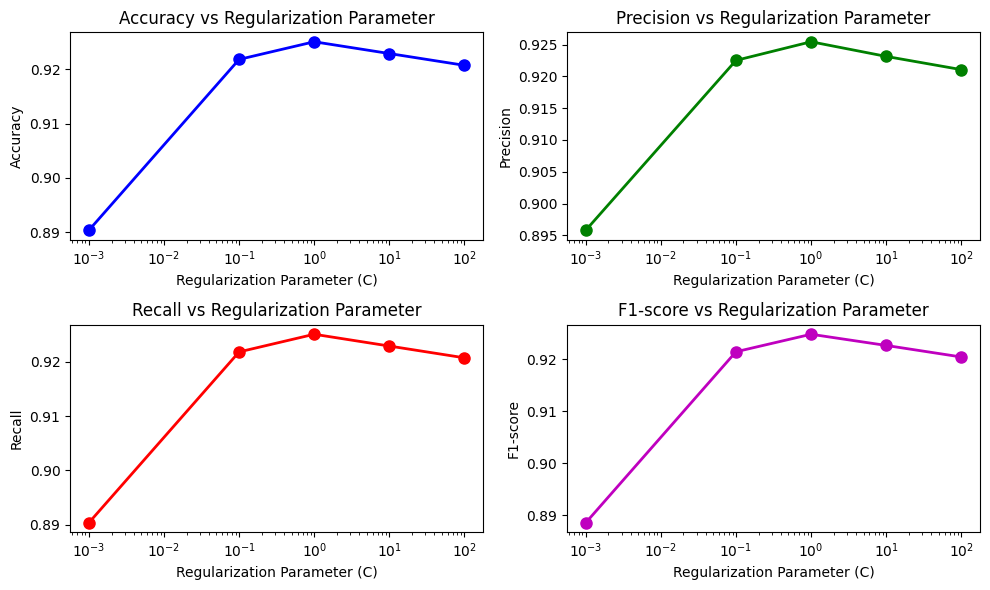

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt


X = spambase.data.features.to_numpy()
y = spambase.data.targets.to_numpy()
scaler = StandardScaler()
X = scaler.fit_transform(X)
y=y.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Regularization parameter values to test
C_values = [0.001, 0.1, 1, 10, 100]

# Lists to store evaluation metrics for different C values
accuracy_values = []
precision_values = []
recall_values = []
f1_values = []

# Train SVM models with different regularization parameters and calculate metrics
for C in C_values:
    # Initialize SVM classifier with the current C value
    svm_model = SVC(kernel='linear', C=C, random_state=42)

    # Train the model
    svm_model.fit(X_train, y_train)

    # Predict on test data
    y_pred = svm_model.predict(X_test)

    # Calculate evaluation metrics and store them
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    accuracy_values.append(accuracy)
    precision_values.append(precision)
    recall_values.append(recall)
    f1_values.append(f1)

# Plotting the evaluation metrics
plt.figure(figsize=(10, 6))

# Plot accuracy
plt.subplot(2, 2, 1)
plt.plot(C_values, accuracy_values, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.xscale('log')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Regularization Parameter')

# Plot precision
plt.subplot(2, 2, 2)
plt.plot(C_values, precision_values, marker='o', color='g', linestyle='-', linewidth=2, markersize=8)
plt.xscale('log')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Precision')
plt.title('Precision vs Regularization Parameter')

# Plot recall
plt.subplot(2, 2, 3)
plt.plot(C_values, recall_values, marker='o', color='r', linestyle='-', linewidth=2, markersize=8)
plt.xscale('log')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Recall')
plt.title('Recall vs Regularization Parameter')

# Plot F1-score
plt.subplot(2, 2, 4)
plt.plot(C_values, f1_values, marker='o', color='m', linestyle='-', linewidth=2, markersize=8)
plt.xscale('log')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('F1-score')
plt.title('F1-score vs Regularization Parameter')

plt.tight_layout()
plt.show()


{'accuracy': [0.5765472312703583, 0.7231270358306189, 0.8393051031487514, 0.9185667752442996, 0.9315960912052117], 'precision': [0.33240670988551607, 0.7972378406706976, 0.86026508319177, 0.9198896829505937, 0.9320333378238186], 'recall': [0.5765472312703583, 0.7231270358306189, 0.8393051031487514, 0.9185667752442996, 0.9315960912052117], 'f1_score': [0.42168950386303067, 0.6862604219154048, 0.8326869003890973, 0.9179951253857518, 0.9313129878633263]}


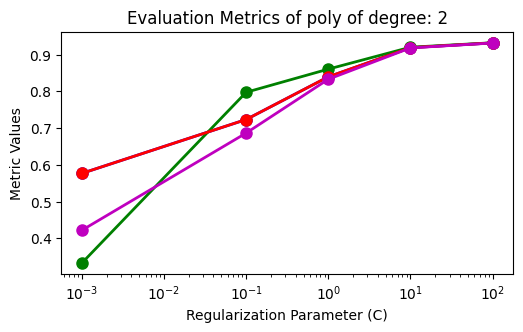

{'accuracy': [0.5819761129207384, 0.6862106406080347, 0.7643865363735071, 0.8577633007600435, 0.9239956568946797], 'precision': [0.7576739257215197, 0.7891535278606556, 0.8125196292208433, 0.8721995224220112, 0.9260358894267173], 'recall': [0.5819761129207384, 0.6862106406080347, 0.7643865363735071, 0.8577633007600435, 0.9239956568946797], 'f1_score': [0.4338669435831805, 0.6290733191772782, 0.7433931330909556, 0.8533608053057969, 0.923362256328884]}


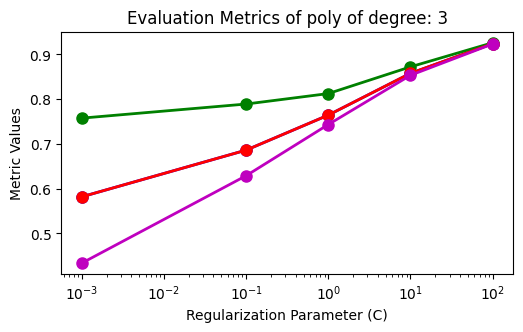

{'accuracy': [0.5765472312703583, 0.9087947882736156, 0.9348534201954397, 0.9381107491856677, 0.9283387622149837], 'precision': [0.33240670988551607, 0.9134969798706446, 0.9355438527115785, 0.9387570626754904, 0.9288113297375262], 'recall': [0.5765472312703583, 0.9087947882736156, 0.9348534201954397, 0.9381107491856677, 0.9283387622149837], 'f1_score': [0.42168950386303067, 0.9075517241301602, 0.9345391992106767, 0.9378265248291895, 0.9280260130903975]}


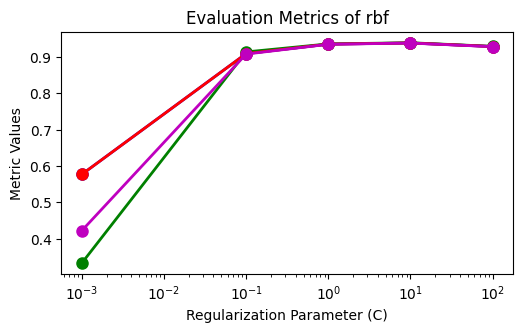

{'accuracy': [0.5765472312703583, 0.8914223669923995, 0.8892508143322475, 0.8599348534201955, 0.8599348534201955], 'precision': [0.33240670988551607, 0.8938211642230245, 0.8891272581680256, 0.8596180924551933, 0.859605527878904], 'recall': [0.5765472312703583, 0.8914223669923995, 0.8892508143322475, 0.8599348534201955, 0.8599348534201955], 'f1_score': [0.42168950386303067, 0.8902739384234444, 0.8889130233454514, 0.859651035187488, 0.8595947661900293]}


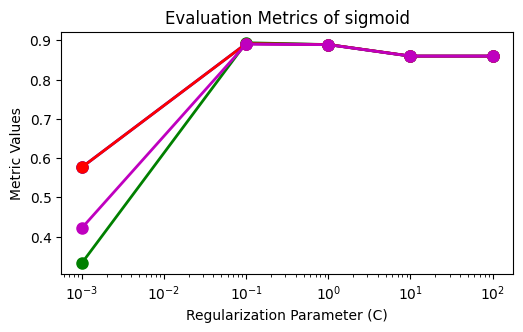

In [ ]:
import warnings

warnings.simplefilter("ignore")

def plot_evaluation_metrics(evaluation_metrics,title):
  print(evaluation_metrics)
  colors=['b','g','r','m']
  plt.figure(figsize=(10, 6))
  j=0
  for metric_name, metric_values in evaluation_metrics.items():
    plt.subplot(2, 2, 2)
    plt.plot(C_values,metric_values, marker='o', color=colors[j], linestyle='-', linewidth=2, markersize=8)
    plt.xscale('log')
    plt.xlabel('Regularization Parameter (C)')
    plt.ylabel('Metric Values')
    plt.title(f'Evaluation Metrics of {title}')
    j=j+1
  plt.tight_layout()
  plt.show()

for kernel_type in ['poly', 'rbf', 'sigmoid']:
  if(kernel_type=='poly'):
    degree_values = [2, 3]
  else:
    degree_values = [1]
  for kernel_degree in degree_values:
    accuracy_values = []
    precision_values = []
    recall_values = []
    f1_values = []
    for C in C_values:
        # Initialize SVM classifier with the current C value, kernel, and degree
        svm_model = SVC(kernel=kernel_type, degree=kernel_degree, C=C, random_state=42)

        # Train the model
        svm_model.fit(X_train, y_train)

        # Predict on test data
        y_pred = svm_model.predict(X_test)

        # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Store the evaluation metrics
        accuracy_values.append(accuracy)
        precision_values.append(precision)
        recall_values.append(recall)
        f1_values.append(f1)

    # Example usage:

    evaluation_metrics = {
        'accuracy': accuracy_values,#in blue color
        'precision': precision_values, # in green color
        'recall': recall_values, # in red color
        'f1_score': f1_values # in magenta color
    }
    title=kernel_type
    if(kernel_type=='poly'):
      title=title+" of degree: "+str(kernel_degree)
    plot_evaluation_metrics(evaluation_metrics,title)

Polynomial Degree	Train Accuracy	Test Accuracy
1			0.8117		0.7959
1			0.9318		0.9273
3			0.6418		0.6113
3			0.9622		0.9240


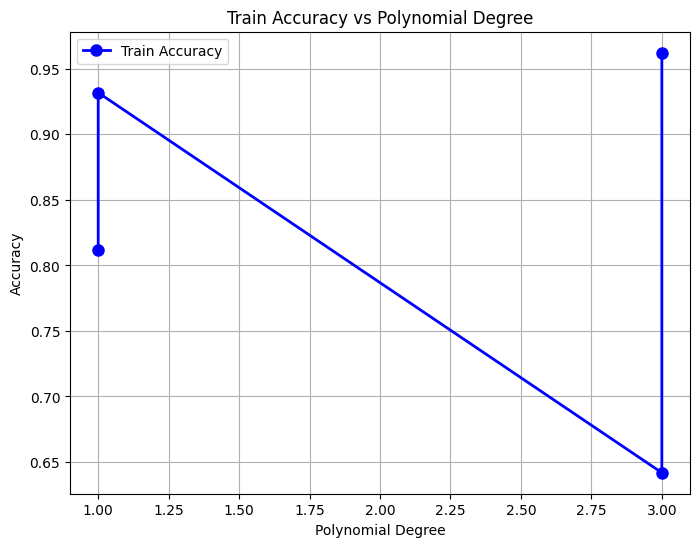

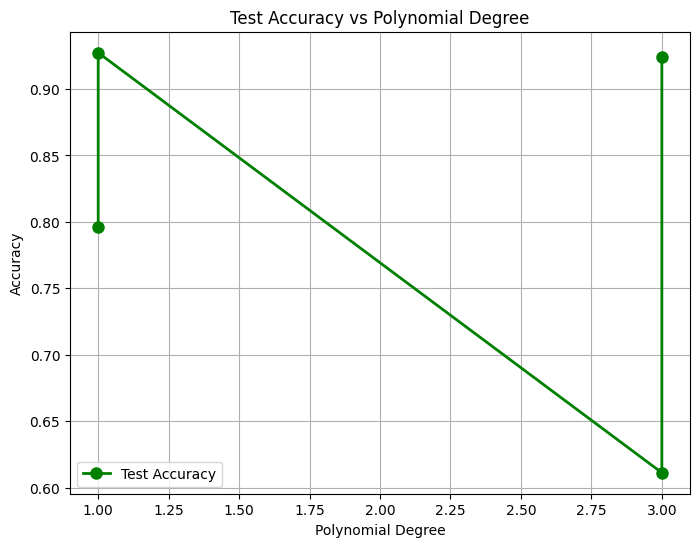

In [ ]:
degrees = [1, 1, 3, 3]
C_values = [0.01, 100, 0.01, 100]

train_accuracy_values = []
test_accuracy_values = []

for idx, degree in enumerate(degrees):

    C = C_values[idx]

    # Initialize SVM classifier with the current degree and C value
    svm_model = SVC(kernel='poly', degree=degree, C=C, random_state=42)

    # Train the model
    svm_model.fit(X_train, y_train)

    # Predict on training data
    y_train_pred = svm_model.predict(X_train)

    # Predict on test data
    y_test_pred = svm_model.predict(X_test)

    # Calculate accuracy for training and test sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Store accuracy values
    train_accuracy_values.append(train_accuracy)
    test_accuracy_values.append(test_accuracy)

# Tabulate and print the accuracy values
print("Polynomial Degree\tTrain Accuracy\tTest Accuracy")
for idx, degree in enumerate(degrees):
    print(f"{degree}\t\t\t{train_accuracy_values[idx]:.4f}\t\t{test_accuracy_values[idx]:.4f}")

# Plotting the results
plt.figure(figsize=(8, 6))

# Plot train accuracy
plt.plot(degrees, train_accuracy_values, marker='o', color='b', linestyle='-', linewidth=2, markersize=8, label='Train Accuracy')
plt.xlabel('Polynomial Degree')
plt.ylabel('Accuracy')
plt.title('Train Accuracy vs Polynomial Degree')
plt.grid(True)
plt.legend()
plt.show()

# Plot test accuracy
plt.figure(figsize=(8, 6))
plt.plot(degrees, test_accuracy_values, marker='o', color='g', linestyle='-', linewidth=2, markersize=8, label='Test Accuracy')
plt.xlabel('Polynomial Degree')
plt.ylabel('Accuracy')
plt.title('Test Accuracy vs Polynomial Degree')
plt.grid(True)
plt.legend()
plt.show()
